EasyVisa Project

Context:

Business communities in the United States are facing high demand for human resources, but one of the constant challenges is identifying and attracting the right talent, which is perhaps the most important element in remaining competitive. Companies in the United States look for hard-working, talented, and qualified individuals both locally as well as abroad.

The Immigration and Nationality Act (INA) of the US permits foreign workers to come to the United States to work on either a temporary or permanent basis. The act also protects US workers against adverse impacts on their wages or working conditions by ensuring US employers' compliance with statutory requirements when they hire foreign workers to fill workforce shortages. The immigration programs are administered by the Office of Foreign Labor Certification (OFLC).

OFLC processes job certification applications for employers seeking to bring foreign workers into the United States and grants certifications in those cases where employers can demonstrate that there are not sufficient US workers available to perform the work at wages that meet or exceed the wage paid for the occupation in the area of intended employment.

Objective:
In FY 2016, the OFLC processed 775,979 employer applications for 1,699,957 positions for temporary and permanent labor certifications. This was a nine percent increase in the overall number of processed applications from the previous year. The process of reviewing every case is becoming a tedious task as the number of applicants is increasing every year.

The increasing number of applicants every year calls for a Machine Learning based solution that can help in shortlisting the candidates having higher chances of VISA approval. OFLC has hired your firm EasyVisa for data-driven solutions. You as a data scientist have to analyze the data provided and, with the help of a classification model:

Facilitate the process of visa approvals.
Recommend a suitable profile for the applicants for whom the visa should be certified or denied based on the drivers that significantly influence the case status.


Data Description
The data contains the different attributes of the employee and the employer. The detailed data dictionary is given below.

case_id: ID of each visa application
continent: Information of continent the employee
education_of_employee: Information of education of the employee
has_job_experience: Does the employee has any job experience? Y= Yes; N = No
requires_job_training: Does the employee require any job training? Y = Yes; N = No
no_of_employees: Number of employees in the employer's company
yr_of_estab: Year in which the employer's company was established
region_of_employment: Information of foreign worker's intended region of employment in the US.
prevailing_wage: Average wage paid to similarly employed workers in a specific occupation in the area of intended employment. The purpose of the prevailing wage is to ensure that the foreign worker is not underpaid compared to other workers offering the same or similar service in the same area of employment.
unit_of_wage: Unit of prevailing wage. Values include Hourly, Weekly, Monthly, and Yearly.
full_time_position: Is the position of work full-time? Y = Full Time Position; N = Part Time Position
case_status: Flag indicating if the Visa was certified or denied

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
import scipy.stats as stats
from sklearn import metrics
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
import warnings
warnings.filterwarnings('ignore')
import warnings
warnings.filterwarnings("ignore")

import numpy as np   
import pandas as pd    
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor,RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, StackingRegressor
from xgboost import XGBRegressor
from sklearn import metrics
from sklearn.model_selection import GridSearchCV, train_test_split

In [2]:
#Loading dataset
data=pd.read_csv("EasyVisa.csv")

View the first 5 rows of the dataset.

In [3]:
data.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


In [4]:
data.tail()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.57,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.79,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.85,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.77,Year,Y,Certified
25479,EZYV25480,Asia,Bachelor's,Y,N,3195,1960,Midwest,70876.91,Year,Y,Certified


Check the shape

In [5]:
data.shape

(25480, 12)

The data has 12 columns and 25480 rows.

Check data types and number of non-null values for each column.

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB


We can see that there are total of 12 columns and 25,479 rows in the dataset.
The columns' data type are integers, object and float.
The number of non-null values of each column is equal to the number of total rows in the dataset i.e. no null value. We can further confirm this using isna() method.

In [7]:
#Dropping columns from the datafram
data = data.drop(['case_id'], axis=1, errors='ignore')
data.shape

(25480, 11)

We drop case_id as dropping will not affect how model performs.

In [8]:
data.isna().sum()

continent                0
education_of_employee    0
has_job_experience       0
requires_job_training    0
no_of_employees          0
yr_of_estab              0
region_of_employment     0
prevailing_wage          0
unit_of_wage             0
full_time_position       0
case_status              0
dtype: int64

There are no missing values in the data.

In [9]:
data.nunique()

continent                    6
education_of_employee        4
has_job_experience           2
requires_job_training        2
no_of_employees           7105
yr_of_estab                199
region_of_employment         5
prevailing_wage          25454
unit_of_wage                 4
full_time_position           2
case_status                  2
dtype: int64

#changing object dtype to category  to save memory
data.continent=data["continent"].astype("category")
data.education_of_employee=data["education_of_employee"].astype("category")
data.has_job_experience=data["has_job_experience"].astype("category")
data.requires_job_training=data["requires_job_training"].astype("category")
data.region_of_employment=data["region_of_employment"].astype("category")
data.unit_of_wage=data["unit_of_wage"].astype("category")
data.full_time_position=data["full_time_position"].astype("category")
data.case_status=data["case_status"].astype("category")

In [11]:
# data.describe(include=["category"])

In [12]:
cat_cols=['continent','education_of_employee','has_job_experience','requires_job_training','region_of_employment','unit_of_wage','full_time_position','case_status']
for column in cat_cols:
    print(data[column].value_counts())
    print('-'*30)

Asia             16861
Europe            3732
North America     3292
South America      852
Africa             551
Oceania            192
Name: continent, dtype: int64
------------------------------
Bachelor's     10234
Master's        9634
High School     3420
Doctorate       2192
Name: education_of_employee, dtype: int64
------------------------------
Y    14802
N    10678
Name: has_job_experience, dtype: int64
------------------------------
N    22525
Y     2955
Name: requires_job_training, dtype: int64
------------------------------
Northeast    7195
South        7017
West         6586
Midwest      4307
Island        375
Name: region_of_employment, dtype: int64
------------------------------
Year     22962
Hour      2157
Week       272
Month       89
Name: unit_of_wage, dtype: int64
------------------------------
Y    22773
N     2707
Name: full_time_position, dtype: int64
------------------------------
Certified    17018
Denied        8462
Name: case_status, dtype: int64
---------

There are 6 unique continents, Asia ranking at the top.
Bachelor's degree is the leading education for the applicants.
Number of applicants with prior job experience is greater than those without.
Northeast ranks first in terms of region of employment.
Most of the applicants are seeking full-time position.
About twice the number of applicants have their visa certified as compared to those denied.

In [13]:
# checking for duplicate values
data.duplicated().sum()

0

There are no duplicate data values.

Exploratory Data Analysis
Statistical summary

In [14]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
no_of_employees,25480.0,5667.043210,22877.928848,-26.0000,1022.00,2109.00,3504.0000,602069.00
yr_of_estab,25480.0,1979.409929,42.366929,1800.0000,1976.00,1997.00,2005.0000,2016.00
prevailing_wage,25480.0,74455.814592,52815.942327,2.1367,34015.48,70308.21,107735.5125,319210.27


The maximum and minimum no_of_employees suggest outliers are present
The mean prevailing_wage is about 74455 compared to a maximum of about 319210

Those with higher education may want to travel abroad for a well-paid job. Does education play a role in Visa certification?

How does the visa status vary across different continents?

Experienced professionals might look abroad for opportunities to improve their lifestyles and career development. Does work experience influence visa status?

In the United States, employees are paid at different intervals. Which pay unit is most likely to be certified for a visa?

The US government has established a prevailing wage to protect local talent and foreign workers. How does the visa status change with the prevailing wage?

Univariate Analysis

In [15]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

Observations on no_of_employees

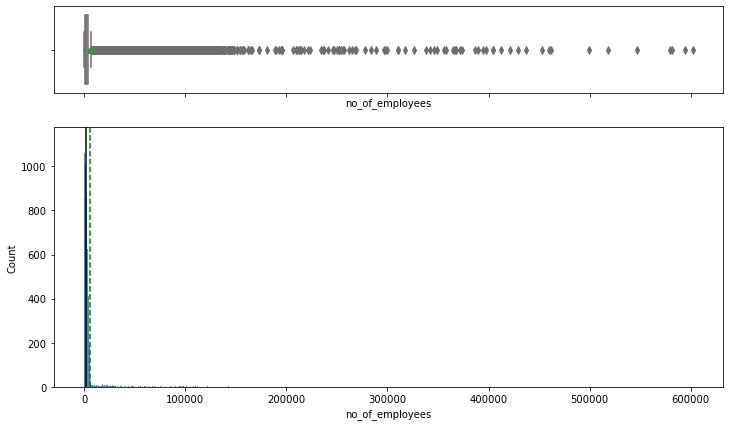

In [16]:
histogram_boxplot(data, "no_of_employees")

There are outliers in this variable and it's distribution is right skewed.

Observations on yr_of_established

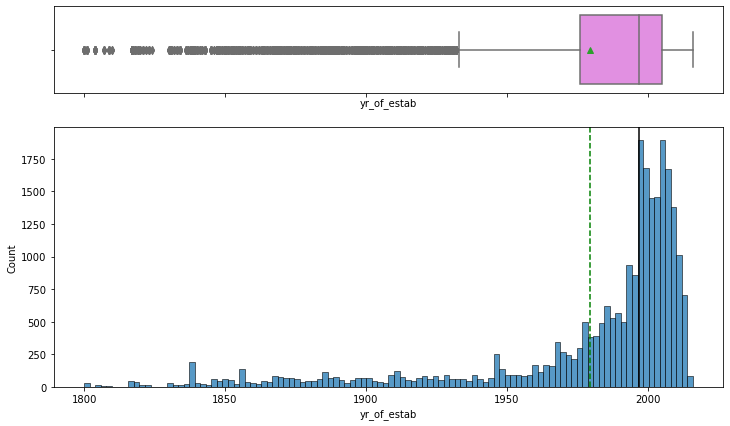

In [17]:
histogram_boxplot(data, "yr_of_estab")

There are outliers in this variable. It is left skewed.

Observations on prevailing_wage

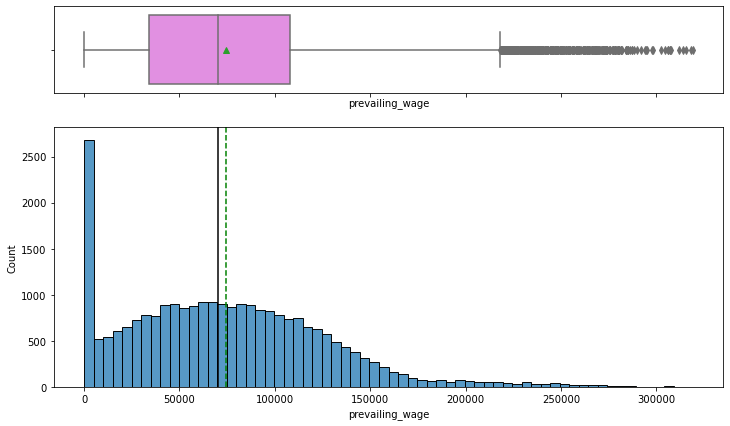

In [18]:
histogram_boxplot(data, "prevailing_wage")

It is right skewed.
The mean prevailing_wage is 74455.


Function to create barplots that indicate percentage for each category

In [19]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

Observations on continent

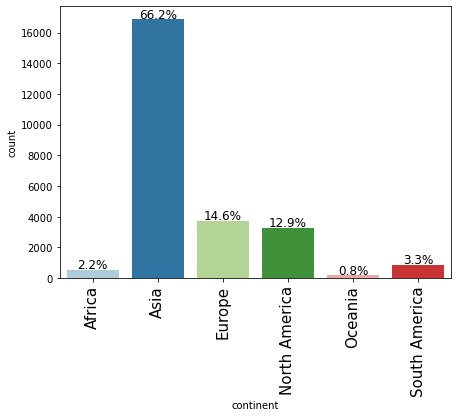

In [20]:
labeled_barplot(data, "continent",perc=True)

Majority of applicants (66.2%) are from Asia.

Observations on Education of employees

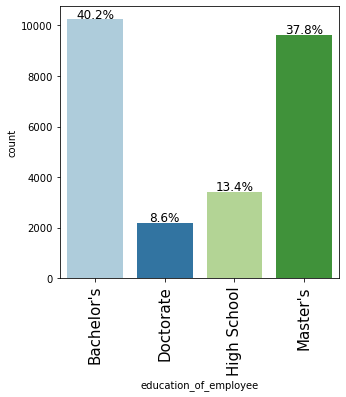

In [21]:
labeled_barplot(data, "education_of_employee",perc=True)

Bachelor's degree constitute the greater level of education of the applicants.
About 8.6 %, the least are the Doctorate holders.

Observations on job experience

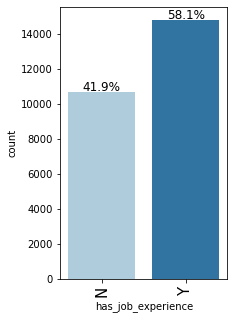

In [22]:
labeled_barplot(data, "has_job_experience",perc=True)

58.1% of the applicants have job experience

Observations on requires_job_training

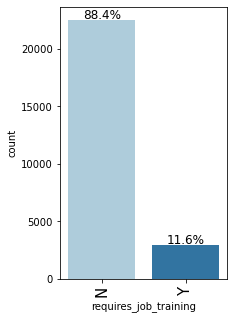

In [23]:
labeled_barplot(data, "requires_job_training",perc=True)

88.4% requires job training versus 11.6 % who reequire no job training.

Observation on region of employment

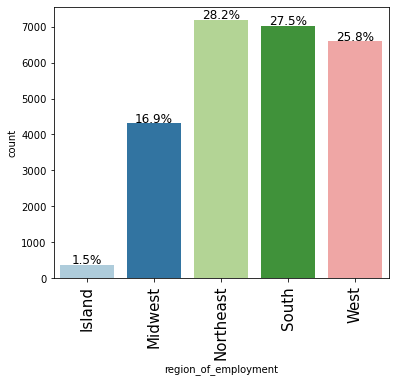

In [24]:
labeled_barplot(data, "region_of_employment",perc=True)

A majority of the employment is located in the Northeast with just about 1.5% located in the Island.

Observation on unit of wage

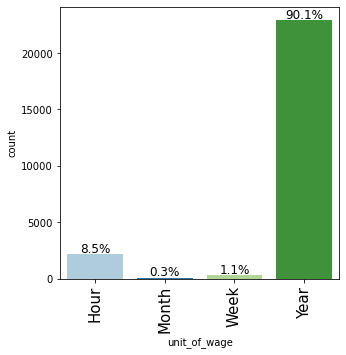

In [25]:
labeled_barplot(data, "unit_of_wage",perc=True)

The largest unit of prevailing wage was yearly, with monthly being the least at 0.3%.

Observation on fulltime position

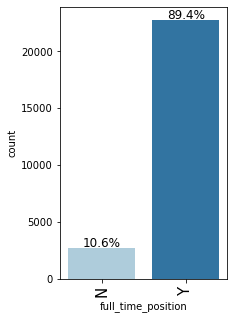

In [26]:
labeled_barplot(data, "full_time_position", perc=True)

89.4% of the applicants were seeking fulltime employment positions.

Observations on case status

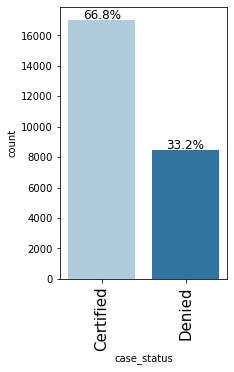

In [27]:
labeled_barplot(data, "case_status", perc=True)

66.8 % of the applicants had their visas certified and the rest were denied.

Bivariate analysis

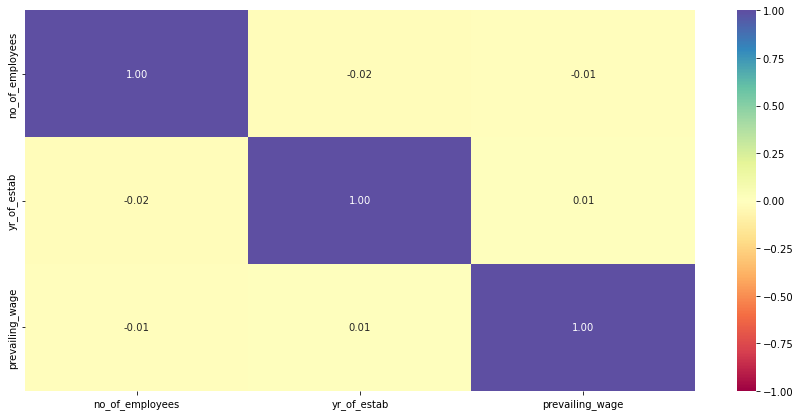

In [28]:
# correlation heatmap
numeric_columns = data.select_dtypes(include=np.number).columns.tolist()
# correlation heatmap
plt.figure(figsize=(15, 7))
sns.heatmap(
    data[numeric_columns].corr(),
    annot=True,
    vmin=-1,
    vmax=1,
    fmt=".2f",
    cmap="Spectral",
)
plt.show()

As the data appears there does not seem to be 

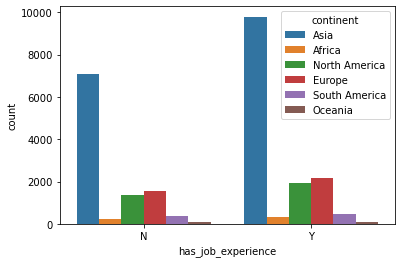

In [29]:
sns.countplot(data = data, x='has_job_experience',hue='continent');

<AxesSubplot:xlabel='case_status', ylabel='count'>

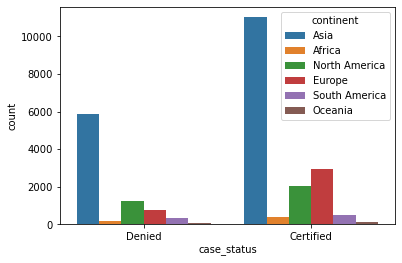

In [30]:
sns.countplot(data = data, x='case_status',hue='continent')

<AxesSubplot:xlabel='unit_of_wage', ylabel='count'>

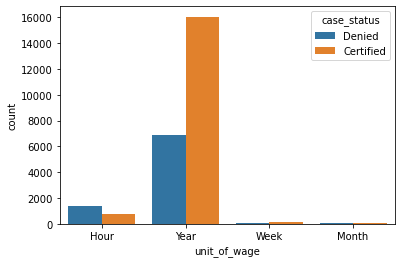

In [31]:
sns.countplot(data = data, x='unit_of_wage',hue='case_status')

<AxesSubplot:xlabel='has_job_experience', ylabel='count'>

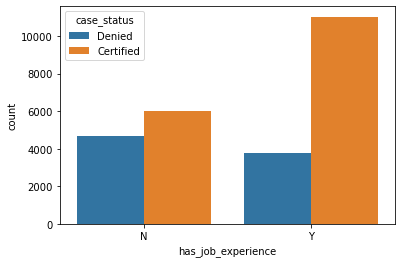

In [32]:
sns.countplot(data = data, x='has_job_experience',hue='case_status')

<AxesSubplot:xlabel='education_of_employee', ylabel='count'>

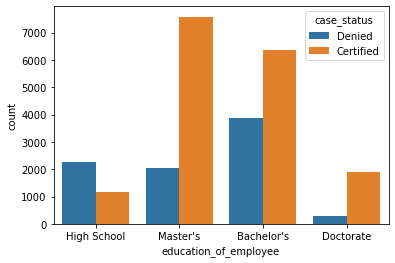

In [33]:
sns.countplot(data = data, x='education_of_employee',hue='case_status')

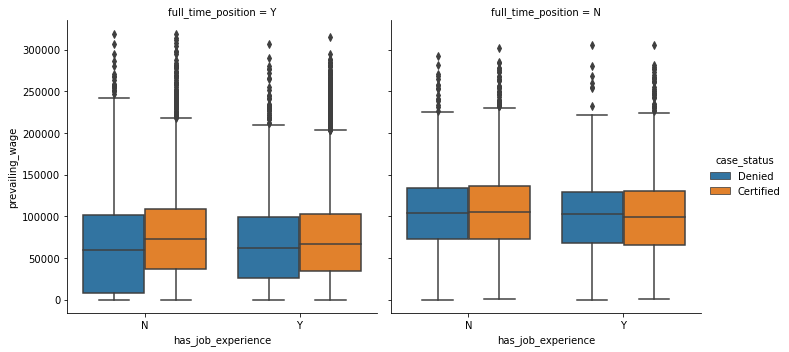

In [34]:
sns.catplot(x="has_job_experience",
               y = "prevailing_wage",
               hue="case_status", 
               col="full_time_position", 
               data=data, 
               kind="box");

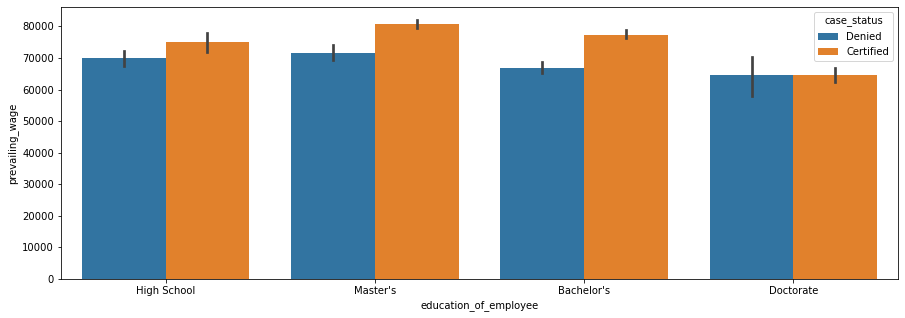

In [35]:
plt.figure(figsize=(15,5))
sns.barplot(data=data,x='education_of_employee', y='prevailing_wage',hue='case_status')
plt.show()


In [36]:
X = data.drop(['case_status'],axis=1)
y = data['case_status'].apply(lambda x : 1 if x=='Yes' else 0)

Split the dataset

When classification problems exhibit a significant imbalance in the distribution of the target classes, it is good to use stratified sampling to ensure that relative class frequencies are approximately preserved in train and test sets.
This is done using the stratify parameter in the train_test_split function.

In [37]:
data = pd.get_dummies(
    data,
    columns=[
        "continent",
        "education_of_employee",
        "has_job_experience",
        "requires_job_training",
        "unit_of_wage",
        "region_of_employment",
        "full_time_position",
        "case_status",
    ],
    drop_first=True,
    dtype=float,
)
data.head()

,no_of_employees,yr_of_estab,prevailing_wage,continent_Asia,continent_Europe,continent_North America,continent_Oceania,continent_South America,education_of_employee_Doctorate,education_of_employee_High School,...,requires_job_training_Y,unit_of_wage_Month,unit_of_wage_Week,unit_of_wage_Year,region_of_employment_Midwest,region_of_employment_Northeast,region_of_employment_South,region_of_employment_West,full_time_position_Y,case_status_Denied
0,14513,2007,592.2029,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
1,2412,2002,83425.6500,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
2,44444,2008,122996.8600,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0
3,98,1897,83434.0300,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0
4,1082,2005,149907.3900,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0


In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 22 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   no_of_employees                    25480 non-null  int64  
 1   yr_of_estab                        25480 non-null  int64  
 2   prevailing_wage                    25480 non-null  float64
 3   continent_Asia                     25480 non-null  float64
 4   continent_Europe                   25480 non-null  float64
 5   continent_North America            25480 non-null  float64
 6   continent_Oceania                  25480 non-null  float64
 7   continent_South America            25480 non-null  float64
 8   education_of_employee_Doctorate    25480 non-null  float64
 9   education_of_employee_High School  25480 non-null  float64
 10  education_of_employee_Master's     25480 non-null  float64
 11  has_job_experience_Y               25480 non-null  flo

In [39]:
# Splitting data into training and test set:
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.3, random_state=1,stratify=y)
print(X_train.shape, X_test.shape)

(17836, 10) (7644, 10)


In [40]:
y.value_counts(1)

0    1.0
Name: case_status, dtype: float64

In [41]:
y_test.value_counts(1)

0    1.0
Name: case_status, dtype: float64

Building Models

We'll fit different models on the train data and observe their performance.
We'll try to improve that performance by tuning some hyperparameters available for that algorithm.
We'll use GridSearchCv for hyperparameter tuning and r_2 score to optimize the model.
R-square - Coefficient of determination is used to evaluate the performance of a regression model. It is the amount of the variation in the output dependent attribute which is predictable from the input independent variables.
Let's start by creating a function to get model scores, so that we don't have to use the same codes repeatedly.

In [42]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1,
        },
        index=[0],
    )

    return df_perf

In [43]:
##  Function to calculate r2_score and RMSE on train and test data
def get_model_score(model, flag=True):
    '''
    model : classifier to predict values of X

    '''
    # defining an empty list to store train and test results
    score_list=[] 
    
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    
    train_r2=metrics.r2_score(y_train,pred_train)
    test_r2=metrics.r2_score(y_test,pred_test)
    train_rmse=np.sqrt(metrics.mean_squared_error(y_train,pred_train))
    test_rmse=np.sqrt(metrics.mean_squared_error(y_test,pred_test))
    
    #Adding all scores in the list
    score_list.extend((train_r2,test_r2,train_rmse,test_rmse))
    
    # If the flag is set to True then only the following print statements will be dispayed, the default value is True
    if flag==True: 
        print("R-sqaure on training set : ",metrics.r2_score(y_train,pred_train))
        print("R-square on test set : ",metrics.r2_score(y_test,pred_test))
        print("RMSE on training set : ",np.sqrt(metrics.mean_squared_error(y_train,pred_train)))
        print("RMSE on test set : ",np.sqrt(metrics.mean_squared_error(y_test,pred_test)))
    
    # returning the list with train and test scores
    return score_list

In [44]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

Decision Tree Model

We will build our model using the DecisionTreeClassifier function. Using default 'gini' criteria to split.

If the frequency of class A is 10% and the frequency of class B is 90%, then class B will become the dominant class and the decision tree will become biased toward the dominant classes.

In this case, we can pass a dictionary {0:0.17,1:0.83} to the model to specify the weight of each class and the decision tree will give more weightage to class 1.

class_weight is a hyperparameter for the decision tree classifier.

In [46]:
#Fitting the model
dtree = DecisionTreeClassifier(random_state=1)
dtree.fit(X_train,y_train)

ValueError: could not convert string to float: 'North America'

In [ ]:
dtree.fit(X_train, y_train)

In [ ]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

In [ ]:
confusion_matrix_sklearn(dtree, X_test, y_test)

### Hyperparameter Tuning (for Decision Tree)

### Random Forest Classifier

### Hyperparameter Tuning for Random Forest

### XGBoost Classifier

### Hyperparameter Tuning For XGBoost

### Stacking Classifier

In [ ]:
# Stack of Decision Tree, Random Forest, and XGBoost

### Comparing all models

Model evaluation criterion

    Model can make wrong predictions as:
        Predicting an applicant will be denied a visa but the applicant is granted.
        Predicting an applicant will not be denied a visa and the applicant is denied.

Which case is more important?

    Predicting that an applicant will not be denied but gets denied.

How to reduce false negatives

    Company wants Recall to be maximized, greater the Recall higher the chances of minimizing false negatives. Hence, the focus should be on increasing Recall or minimizing the false negatives or in other words identifying the true positives(i.e. Class 1).
    
    

### Feature importance of Best Feature

### Conclusion: